In [ ]:
pip install xgboost

In [ ]:
pip install --upgrade xgboost

In [ ]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
import shap


import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
col_names = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
heart = pd.read_csv("heart.csv", header=0, names=col_names)
print(heart.head())

In [ ]:
print(heart.groupby('target').count())
print(heart.info())

feature_cols = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']
X = heart[feature_cols]
y = heart.target

        age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
target                                                                   
0       499  499              499                     499          499   
1       526  526              526                     526          526   

        fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
target                                                           
0                       499       499                      499   
1                       526       526                      526   

        exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
target                                                                        
0                           499            499       499                499   
1                           526            526       526                526   

        thalassemia  
target               
0               499  
1               526  
<class 'pandas.core.frame.DataFra

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('train size is %i'%y_train.shape[0])
print('test size is %i'%y_test.shape[0])

train size is 717
test size is 308


In [ ]:
xgbm = XGBClassifier(max_depth = 7 , learning_rate = 0.25 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
xgbm.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
xgbm.score(X_train , y_train)


0.99581589958159

In [ ]:
xgbm.score(X_test , y_test)

0.9772727272727273

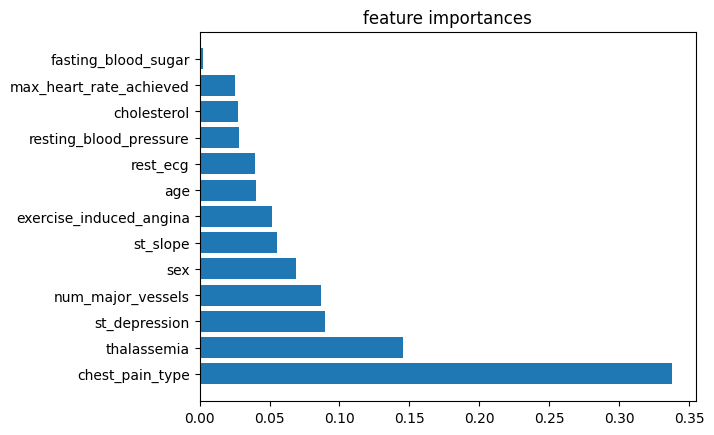

In [ ]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()
features_names = list(heart.columns)
f_importances(abs(xgbm.feature_importances_), features_names, top=13)

In [ ]:
y_pred = xgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.73%


In [ ]:
report=metrics.classification_report(y_test,y_pred)
clf_name_rf=['Random Forest Heart Disease','RegLog']
print('Reporting for %s:'%clf_name_rf)
print(report)

Reporting for ['Random Forest Heart Disease', 'RegLog']:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       161
           1       0.99      0.97      0.98       147

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



0.9767820171546879


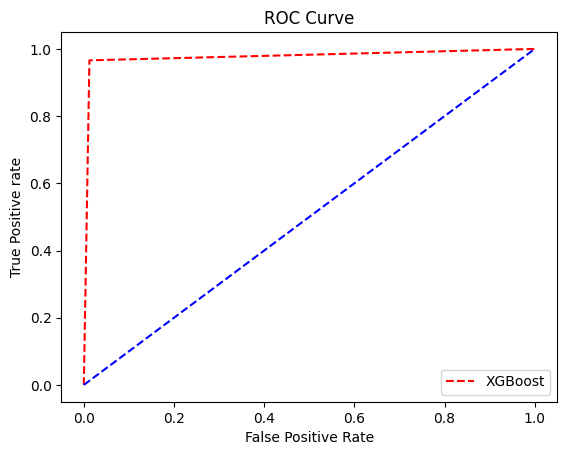

In [ ]:
fpr, tpr, thresh = roc_curve(y_test, y_pred[:], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score = roc_auc_score(y_test, y_pred[:])
print(auc_score)

plt.plot(fpr, tpr, linestyle= '--', color='red', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[159   2]
 [  5 142]]


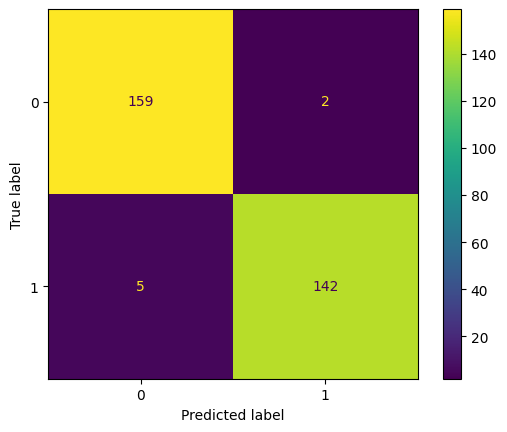

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
pip install --upgrade pip setuptools


In [ ]:
pip install pdpbox

In [ ]:
!pip install --upgrade matplotlib

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

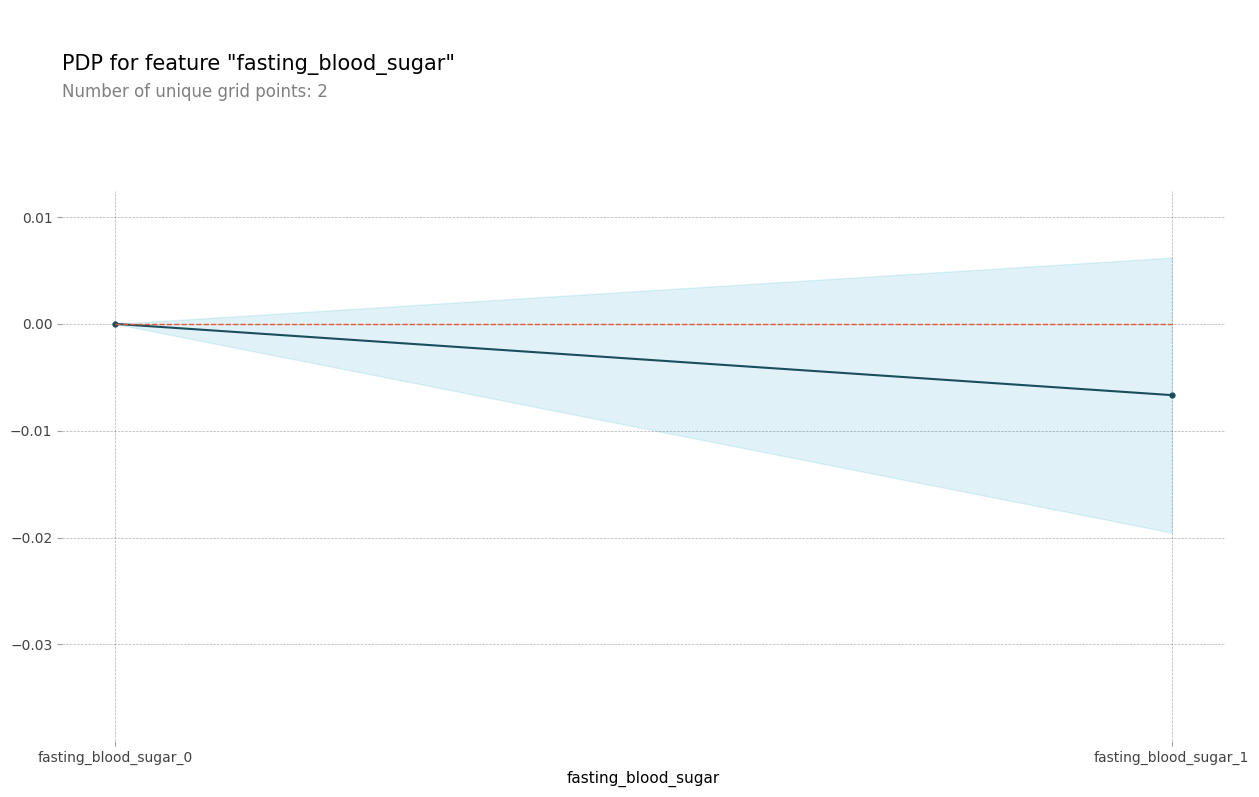

In [ ]:
feature_name = 'fasting_blood_sugar'
pdp_feature = pdp.pdp_isolate(model=xgbm, dataset=X_test, model_features=X_test.columns, feature=feature_name)
fig, axes = pdp.pdp_plot(pdp_feature, feature_name)